In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_Name = "../State-Field and all trackers/Northern Branch Phase II Debris Removal Ops.xlsx"

In [3]:
df = pd.read_excel(file_Name)
df.shape

(2349, 124)

In [4]:
df.head()

,APN,Structural Status,# of Trees,Haz Trees Assessment,Haz Trees,Haz Tree Only,Hazard Tree Status,Street #,Unit #,Street Name,...,Tree Felling Complete,Tree Removal Complete,Number of Hazard Trees Felled,Trees Final Site Walk,Modified Date,duplicate,Sync Status,Ineligible Date,Soils Hold Reason,Butte Alt Program Tree Property
0,071-360-010-000,Returned to County,0.0,2020-12-08,No,NaN,No Hazard Trees,1879,NaN,Lumpkin Road,...,NaT,NaT,NaN,NaT,2021-10-20 11:11:25,NaN,NaN,NaT,NaN,NaN
1,071-060-011-000,Returned to County,NaN,NaT,Do Not Assess,NaN,NaN,99,NaN,Kanaka Ranch Road,...,NaT,NaT,NaN,NaT,2021-08-26 09:59:47,NaN,NaN,NaT,NaN,NaN
2,062-320-029-000,Ready for Tree Operations,10.0,2021-04-02,Yes,NaN,Ready for Tree Removal,062-320-029-000,Lot 169,Cedar Lane,...,NaT,NaT,NaN,NaT,2021-10-20 20:45:29,NaN,NaN,NaT,NaN,NaN
3,071-400-035-000,Returned to County,0.0,2021-02-05,No,NaN,No Hazard Trees,297,NaN,Simmons Road,...,NaT,NaT,NaN,NaT,2021-08-27 14:20:32,NaN,NaN,NaT,NaN,NaN
4,062-740-008-000,Ready for Tree Operations,1.0,2021-06-24,Yes,NaN,Off-Haul Complete,17,NaN,Hammer Lane,...,2021-08-11,NaT,1.0,NaT,2021-10-19 09:54:39,NaN,NaN,NaT,NaN,NaN


In [5]:
df.columns.to_list()

['APN',
 'Structural Status',
 '# of Trees',
 'Haz Trees Assessment',
 'Haz Trees',
 'Haz Tree Only',
 'Hazard Tree Status',
 'Street #',
 'Unit #',
 'Street Name',
 'City',
 'County',
 'Division',
 'Hold Reason',
 'Hold',
 'Gate Locked?',
 'Code/Key Location',
 'ROE Verified',
 'Declaration',
 'Property Type',
 'Commercial Notes',
 'Scheduled',
 'Consultant',
 'Debris Crew',
 'Debris Crew Leader/Crew#',
 'Debris Crew WO#',
 'ROE Date',
 'Priority',
 'Withdrawal',
 'Not Eligible',
 'Reason for Ineligibility',
 'Determinant for Ineligibility',
 'Safety Concern Property',
 'Phase 1 Complete',
 'Needs Milk Run or Phase 1 Revisit',
 'Milk Run/Phase 1 Revisit Complete',
 'Access Issues',
 'EHP Attention Required',
 'EHP Attn Notes',
 'Monitoring Needed',
 'Monitoring Needed Description',
 'Bio Assessment Notes',
 'Arch Assessment Notes',
 'CalOES Review Notes',
 'Permit Needed',
 'Permit Description',
 'Owner Name',
 'Contact Phone',
 'Contact Email',
 'Site Assessment',
 'RAD/MERC Sweep',


In [6]:
df.loc[:, ['Number of Vehicles', 'Number of Vehicles Removed']] = df.loc[:, ['Number of Vehicles', 'Number of Vehicles Removed']].fillna(0)

In [7]:
df['Number of Vehicles'] = pd.to_numeric(df['Number of Vehicles'], errors='coerce')

In [8]:
df['Number of Vehicles'].dtypes

dtype('float64')

In [9]:
df['Number of Vehicles Removed'].dtypes

dtype('O')

covert Number of vehicles object to a int or float category

In [10]:
df['Number of Vehicles Removed'] = pd.to_numeric(df['Number of Vehicles Removed'], errors='coerce')

In [11]:
df['Number of Vehicles Removed'].dtype

dtype('float64')

Create a new column with vehicles left over

In [12]:
df.loc[:, 'Vehicle Left'] =  df.loc[:, 'Number of Vehicles'] - df.loc[:, 'Number of Vehicles Removed']

In [13]:
dfVecfilt = df[['Number of Vehicles','Number of Vehicles Removed', 'County','Vehicle Left']].groupby('County').sum()
dfVecfilt

,Number of Vehicles,Number of Vehicles Removed,Vehicle Left
County,,,
Butte,5933.0,5043.0,530.0
Del Norte,13.0,11.0,2.0
Lassen,22.0,27.0,-5.0
Nevada,9.0,7.0,2.0
Plumas,1.0,1.0,0.0
Shasta,520.0,517.0,0.0
Siskiyou,849.0,770.0,78.0
Trinity,653.0,544.0,108.0
Yuba,20.0,16.0,4.0


<AxesSubplot:xlabel='County'>

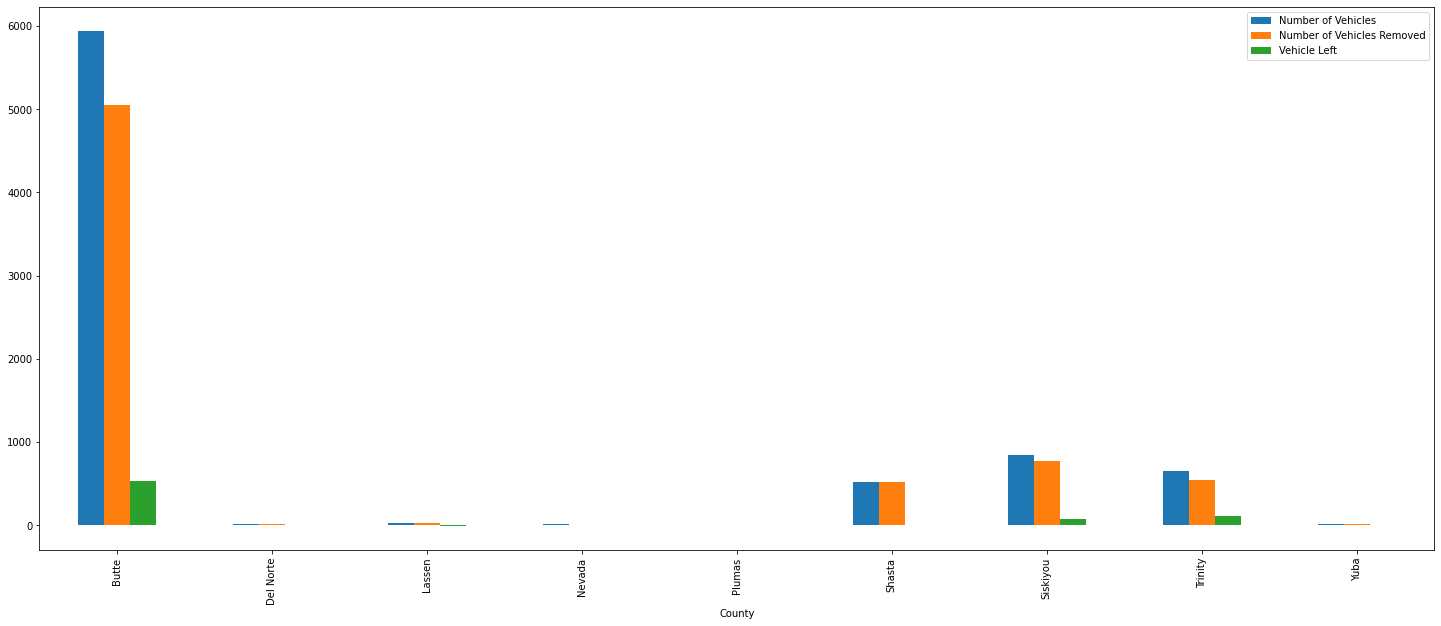

In [14]:
dfVecfilt.plot(kind='bar', figsize=(25,10))

# Make graph above with total for each bar placed on top

In [16]:
dfVecfilt = df[['Number of Vehicles','Number of Vehicles Removed', 'County','Vehicle Left']].groupby('County').sum()
dfVecfilt

df_value2 = dfVecfilt.loc[:, 'Number of Vehicles']
df_value3 = dfVecfilt.loc[:, 'Number of Vehicles Removed']
df_value4 = dfVecfilt.loc[:, 'Vehicle Left']

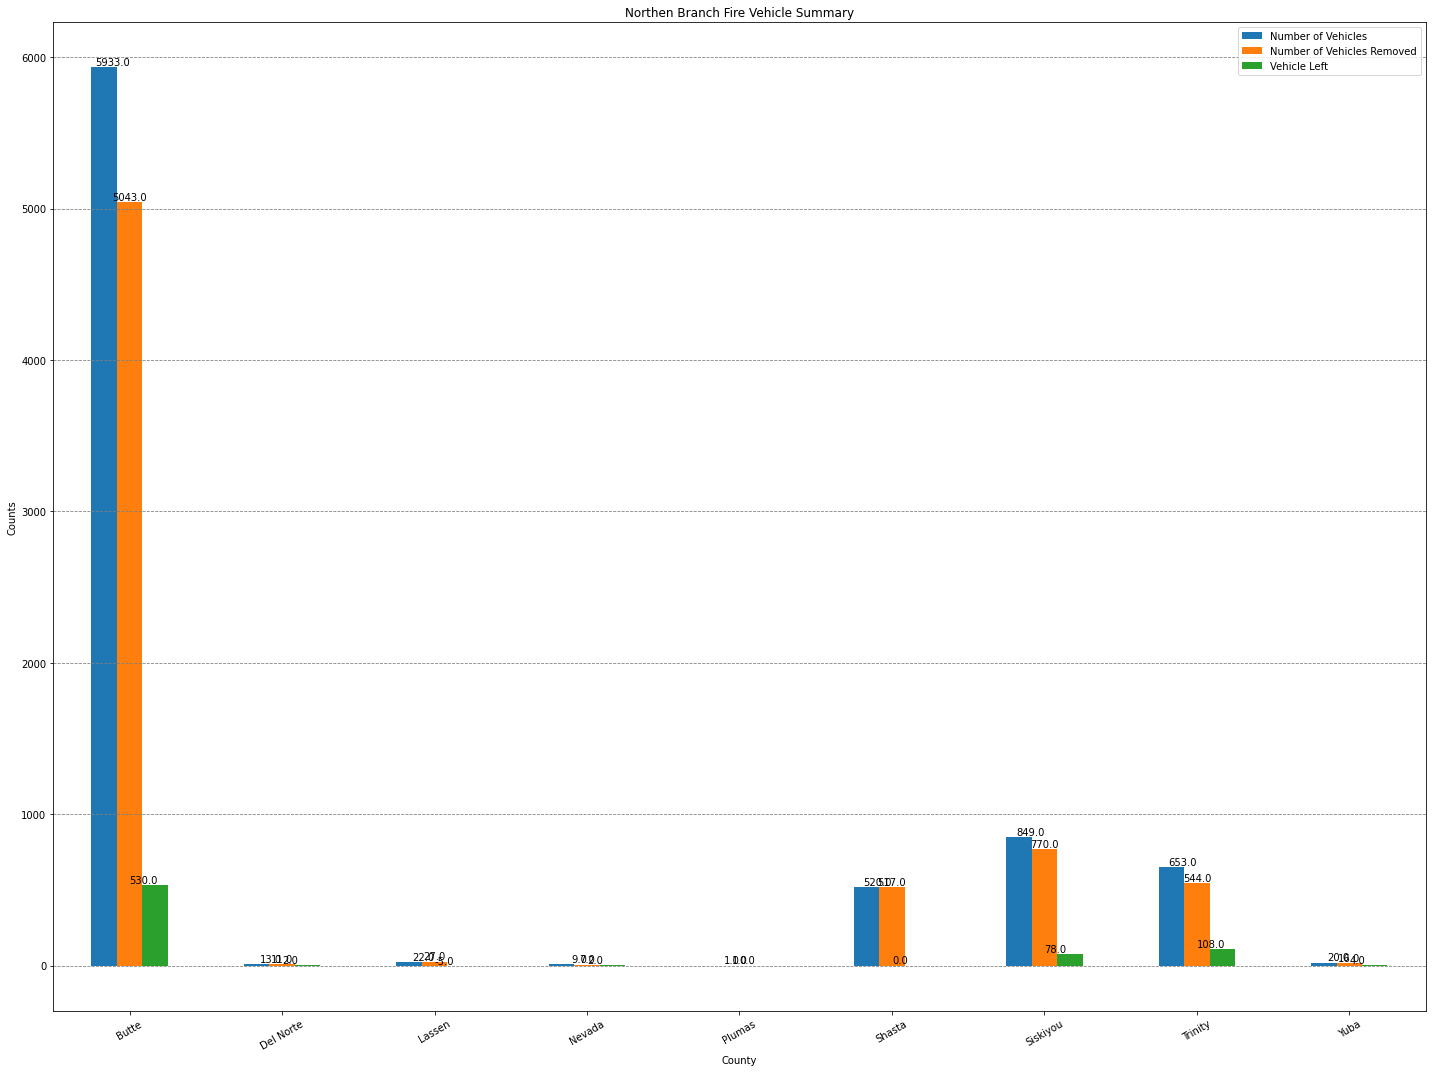

In [17]:
dfVecfilt.plot(kind='bar',  figsize=(20,15)) #do not do df_index from above due to it does the entire data base. 

for i in range(len(dfVecfilt)):
    plt.text(i, df_value2[i], df_value2[i], ha='right', va='bottom')
    plt.text(i, df_value3[i], df_value3[i], ha='center', va='bottom')
    plt.text(i, df_value4[i], df_value4[i], ha='left', va='bottom')
plt.xticks(rotation=30)
plt.title("Northen Branch Fire Vehicle Summary")
plt.ylabel("Counts")
plt.grid(color='gray', linestyle='--', axis='y')
plt.tight_layout()
plt.show()